<a href="https://colab.research.google.com/github/minhducvo04/PyTorch-models/blob/main/PyTorch__Multiclass_Classification_With_sklearn_datasets_make_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from torch import nn

In [ ]:
# Device agnoistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
X = torch.arange(-10,10,1).type(torch.float)
X

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

([<matplotlib.lines.Line2D at 0x7fdd69816970>],
 tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
         1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
         8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
         9.9966e-01, 9.9988e-01]))

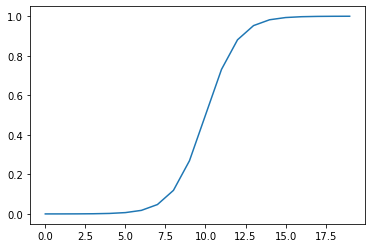

In [ ]:
#Sigmoid
y = torch.sigmoid(X)
plt.plot(y), y

([<matplotlib.lines.Line2D at 0x7fdd692f76d0>],
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
         8., 9.]))

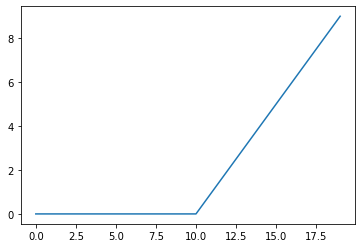

In [ ]:
#ReLU
y = torch.relu(X)
plt.plot(y), y

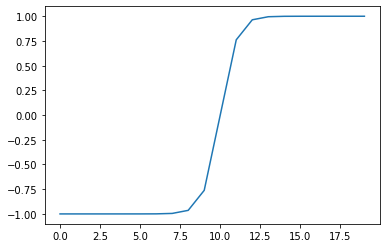

In [ ]:
y = torch.tanh(X)
plt.plot(y)

# Creating a toy multi-class dataset

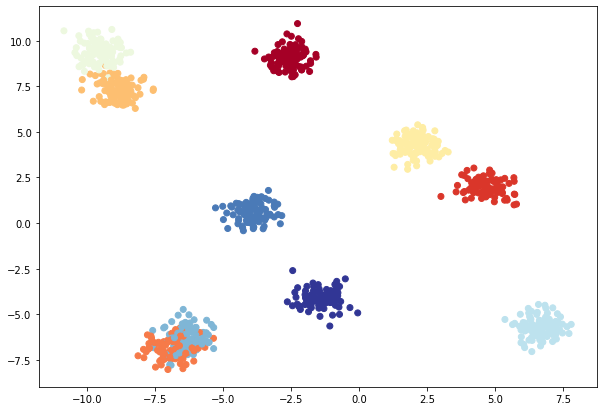

In [ ]:
# Import dependencies
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 10
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=0.5, # To mix up the data
                            random_state=RANDOM_SEED)

# 2. Turn data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split data to train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)

# Building multi-class classification model

In [ ]:
class BlobModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x) # x -> layer 1 -> layer 2 -> output 

model_0 = BlobModelV0(input_features=2,output_features=10).to(device)
model_0 = model_0.to(device)
model_0, list(model_0.parameters())



(BlobModelV0(
   (linear_layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=8, bias=True)
     (1): Linear(in_features=8, out_features=8, bias=True)
     (2): Linear(in_features=8, out_features=10, bias=True)
   )
 ), [Parameter containing:
  tensor([[ 0.5406,  0.5869],
          [-0.1657,  0.6496],
          [-0.1549,  0.1427],
          [-0.3443,  0.4153],
          [ 0.6233, -0.5188],
          [ 0.6146,  0.1323],
          [ 0.5224,  0.0958],
          [ 0.3410, -0.0998]], device='cuda:0', requires_grad=True),
  Parameter containing:
  tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
         device='cuda:0', requires_grad=True),
  Parameter containing:
  tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
          [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
          [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
          [ 0.1795, -0.2155, -

In [ ]:
# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Calculate accuracy - what percentage does the model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)
model_0 = model_0.to(device)

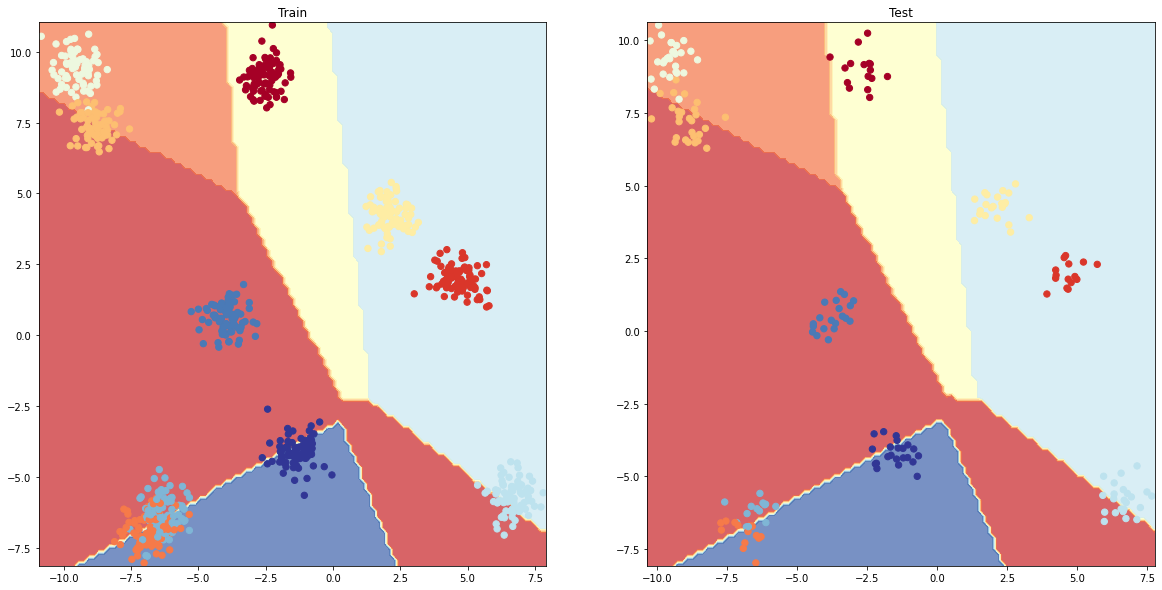

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

#Getting prediction probabilities for a multi-class PyTorch model
In order to evaluate and train our model, we need to convert our model's ouputs (logits) to probabilities and then to prediction labels.

Logits (raw output of the model) -> Probabilities (use `nn.softmax`) -> Pred labels (take the argmax of the prediction probabilities)


#Creating a training loop and a testing loop for a multi-class PyTorch model

In [ ]:
 # Fit the multi-class model to the data 
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 10001

#Loop through the data
for epoch in range(epochs):
   ## Train
   model_0.train().to(device)
   
   y_logits = model_0(X_blob_train).to(device)
   y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

   loss = loss_fn(y_logits,y_blob_train)
   acc = accuracy_fn(y_true=y_blob_train,
                     y_pred=y_pred)
   
   optimizer.zero_grad()

   loss.backward()

   optimizer.step()

   ## Test
   model_0.eval()
   with torch.inference_mode():
     test_logits = model_0(X_blob_test)
     test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

     test_loss = loss_fn(test_logits, y_blob_test)
     test_acc = accuracy_fn(y_true=y_blob_test, 
                            y_pred=test_preds)
  
  #Print out
   if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 2.23466, Acc: 13.50% | Test loss: 1.81020, Test acc: 31.50%
Epoch: 1000 | Loss: 0.29570, Acc: 81.88% | Test loss: 0.28461, Test acc: 85.00%
Epoch: 2000 | Loss: 0.23468, Acc: 85.75% | Test loss: 0.21939, Test acc: 88.50%
Epoch: 3000 | Loss: 0.21001, Acc: 86.50% | Test loss: 0.19627, Test acc: 89.00%
Epoch: 4000 | Loss: 0.23438, Acc: 86.12% | Test loss: 0.18890, Test acc: 89.50%
Epoch: 5000 | Loss: 0.23453, Acc: 86.12% | Test loss: 0.18916, Test acc: 89.50%
Epoch: 6000 | Loss: 0.23120, Acc: 86.12% | Test loss: 0.18743, Test acc: 89.50%
Epoch: 7000 | Loss: 0.22746, Acc: 86.25% | Test loss: 0.18550, Test acc: 89.50%
Epoch: 8000 | Loss: 0.22367, Acc: 86.38% | Test loss: 0.18353, Test acc: 89.50%
Epoch: 9000 | Loss: 0.21988, Acc: 86.50% | Test loss: 0.18153, Test acc: 89.50%
Epoch: 10000 | Loss: 0.25882, Acc: 85.50% | Test loss: 0.21374, Test acc: 88.00%


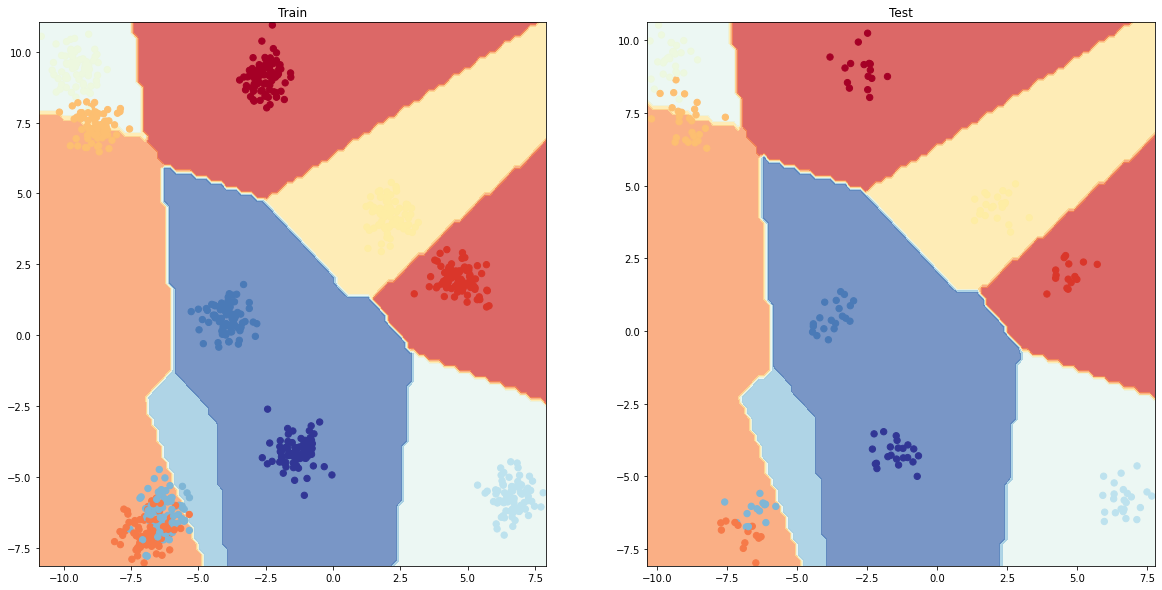

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

In [ ]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.03)
 # Fit the multi-class model to the data 
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 10001

#Loop through the data
for epoch in range(epochs):
   ## Train
   model_0.train().to(device)
   
   y_logits = model_0(X_blob_train).to(device)
   y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

   loss = loss_fn(y_logits,y_blob_train)
   acc = accuracy_fn(y_true=y_blob_train,
                     y_pred=y_pred)
   
   optimizer.zero_grad()

   loss.backward()

   optimizer.step()

   ## Test
   model_0.eval()
   with torch.inference_mode():
     test_logits = model_0(X_blob_test)
     test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

     test_loss = loss_fn(test_logits, y_blob_test)
     test_acc = accuracy_fn(y_true=y_blob_test, 
                            y_pred=test_preds)
  
  #Print out
   if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.23745, Acc: 85.12% | Test loss: 0.13446, Test acc: 93.00%
Epoch: 1000 | Loss: 0.12027, Acc: 94.38% | Test loss: 0.09490, Test acc: 94.50%
Epoch: 2000 | Loss: 0.12582, Acc: 93.50% | Test loss: 0.09338, Test acc: 95.50%
Epoch: 3000 | Loss: 0.12427, Acc: 93.38% | Test loss: 0.09197, Test acc: 95.50%
Epoch: 4000 | Loss: 0.12311, Acc: 93.75% | Test loss: 0.09112, Test acc: 96.00%
Epoch: 5000 | Loss: 0.12219, Acc: 93.88% | Test loss: 0.09055, Test acc: 96.00%
Epoch: 6000 | Loss: 0.12142, Acc: 93.88% | Test loss: 0.09015, Test acc: 96.00%
Epoch: 7000 | Loss: 0.12076, Acc: 94.00% | Test loss: 0.08987, Test acc: 96.00%
Epoch: 8000 | Loss: 0.12018, Acc: 94.00% | Test loss: 0.08966, Test acc: 95.50%
Epoch: 9000 | Loss: 0.11968, Acc: 94.25% | Test loss: 0.08952, Test acc: 95.50%
Epoch: 10000 | Loss: 0.11922, Acc: 94.12% | Test loss: 0.08942, Test acc: 95.50%


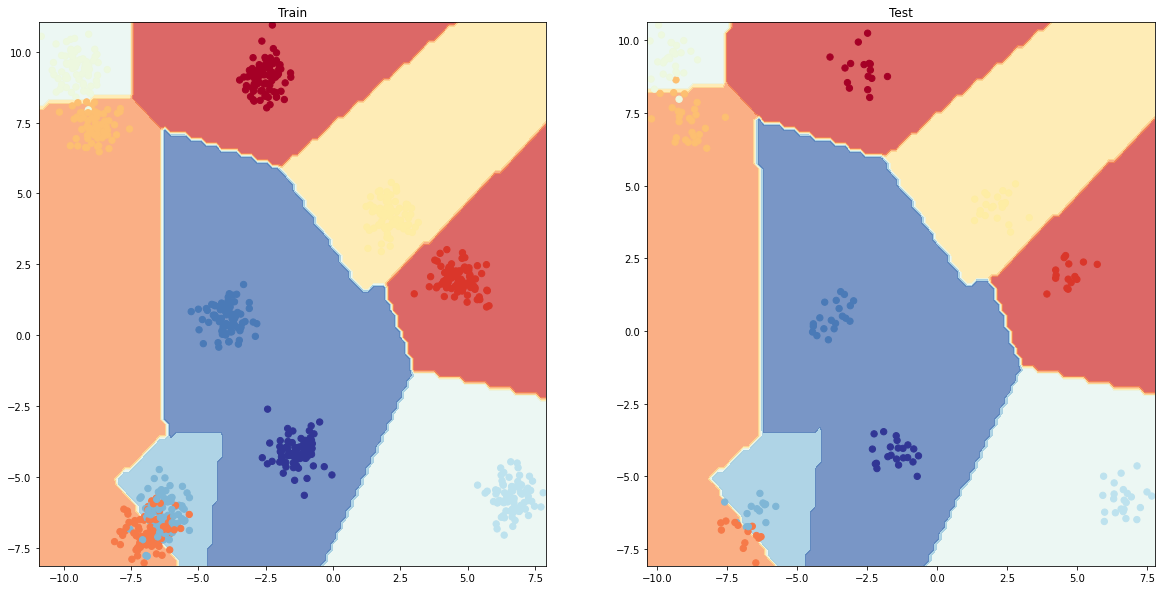

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

# A few more classification metrics ... (to evaluate our classification model)

* Accuracy - Percentages of correct output of our model tp+tn/all
* Precision tp/tp+fp
* Recall tp/tp+fn
* F1-score 2 x precision x recall/precision+recall
* Confusion matrix
* Classification report

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 25.3 MB/s 


In [ ]:
from torchmetrics import Accuracy

#Setup metric
torchmetric_accuracy = Accuracy(task="multiclass",num_classes=10,).to(device)

#Calculate accuracy
torchmetric_accuracy(y_pred ,y_blob_train),  torchmetric_accuracy(test_preds ,y_blob_test)

(tensor(0.9413, device='cuda:0'), tensor(0.9550, device='cuda:0'))